# VADER US

In [1]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
vader = pd.read_csv('../../Results/ResultsUS/vader_groupedUs.csv', parse_dates=['weekdate'])
empath = pd.read_csv('../../Results/ResultsUS/emp_groupedUs.csv', parse_dates=['weekdate'])
empath_count = pd.read_csv('../../Results/ResultsUS/emp_countsUs.csv', parse_dates=['weekdate'])
empath['empadict'] = empath['empadict'].map(lambda x: json.loads(re.sub('\'', '"', x)))
empath_count['empadict'] = empath_count['empadict'].map(lambda x: json.loads(re.sub('\'', '"', x)))

# Normalizing results and building error bars assuming a binomial distribution 
vader['norm'] = vader['counts']/vader['total']
vader['errornorm'] = np.sqrt((vader['counts'] * (vader['total'] - vader['counts']))/ vader['total']) / vader['total']

tweets_pos=vader[vader['sentiment'] == 'positive']
tweets_neg=vader[vader['sentiment'] == 'negative']
tweets_neu=vader[vader['sentiment'] == 'neutral']

emp_cnt = pd.DataFrame(empath_count['empadict'].tolist(),index = empath_count['weekdate'])
category_list=emp_cnt.sum().sort_values(ascending=False)
top_cat = category_list.head(10).keys()


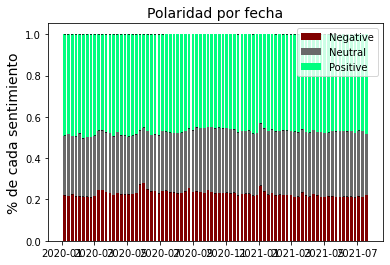

In [2]:

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax.bar(tweets_neg['weekdate'], tweets_neg['norm'], yerr=tweets_neg['errornorm'], label='Negative', 
       color='maroon',width = 5)
ax.bar(tweets_neu['weekdate'], tweets_neu['norm'], yerr=tweets_neu['errornorm'], label='Neutral', 
       color='dimgrey',bottom=tweets_neg['norm'],width = 5)
ax.bar(tweets_pos['weekdate'], tweets_pos['norm'], yerr=tweets_pos['errornorm'], label='Positive',
       color='springgreen', bottom=np.array(tweets_neu['norm'])+np.array(tweets_neg['norm']),
       width = 5)
ax.set_ylabel('Proportion for each sentiment',size =14)
ax.set_title('Polarity by week', size  =14)
ax.legend()

plt.show()


## Empath US

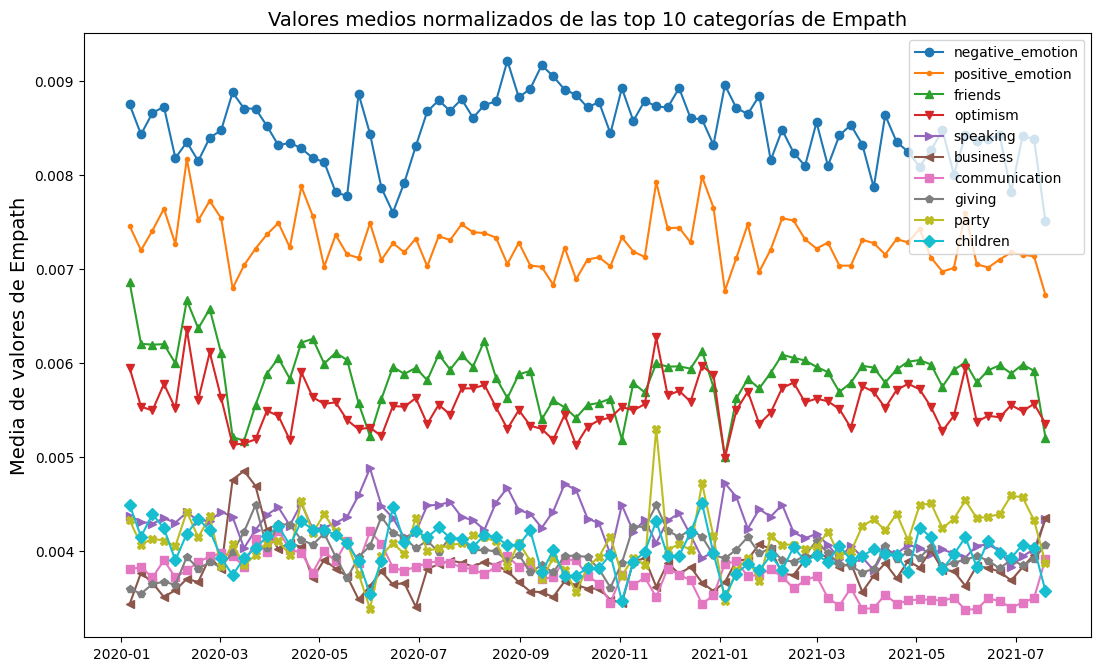

In [3]:
emp_df = pd.DataFrame(empath['empadict'].tolist(),index = empath['weekdate'])

markers=['o','.', '^', 'v', '>', '<', 's', 'p', 'X', 'D']

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)
for i in range(10):
    ax.plot(emp_df[top_cat[i]], marker = markers[i])
ax.set_ylabel('Average Empath values', size =14)
ax.set_title('Normalised average values of Empath top 10 categories',size =14)
ax.legend(top_cat)
plt.show()

## Big 5 US

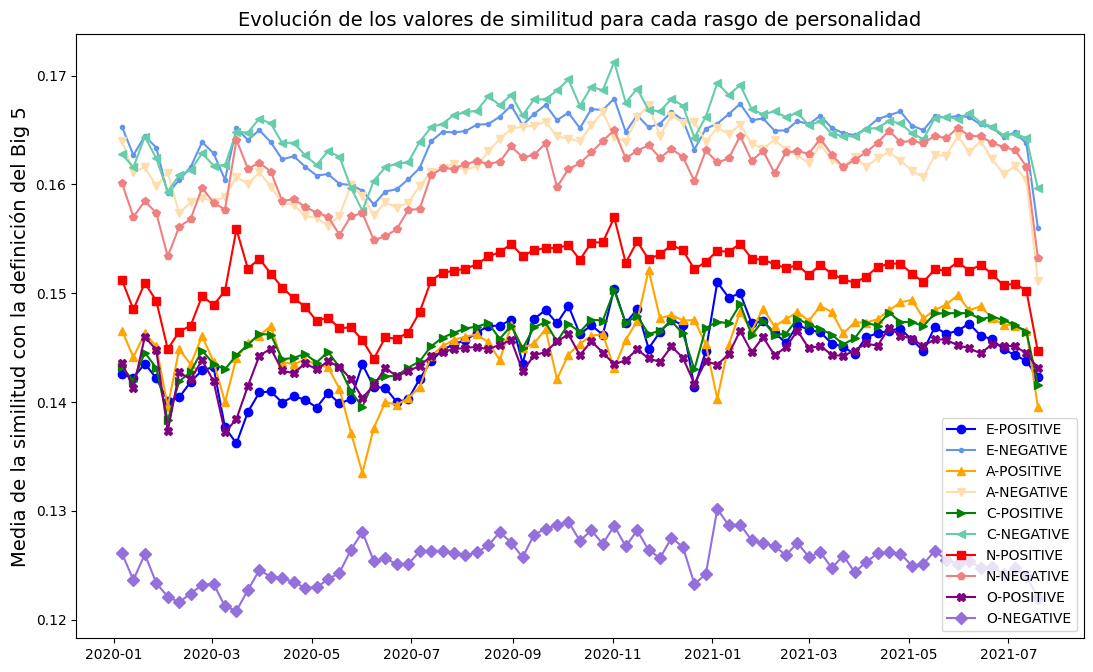

In [4]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
big5 = pd.read_csv('../../Results/ResultsUS/big5_groupedUs.csv', parse_dates=['weekdate'], index_col ='weekdate')

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)

#E
ax.plot(big5['E-POSITIVE'],'o-',color='blue',label='E-POSITIVE'); 
ax.plot(big5['E-NEGATIVE'],'.-',color='cornflowerblue',label='E-NEGATIVE');
#A
ax.plot(big5['A-POSITIVE'],'^-',color='orange',label='A-POSITIVE'); 
ax.plot(big5['A-NEGATIVE'],'v-',color='navajowhite',label='A-NEGATIVE'); 
#C
ax.plot(big5['C-POSITIVE'],'>-',color='green',label='C-POSITIVE'); 
ax.plot(big5['C-NEGATIVE'],'<-',color='mediumaquamarine',label='C-NEGATIVE'); 
#N
ax.plot(big5['N-POSITIVE'],'s-',color='red',label='N-POSITIVE'); 
ax.plot(big5['N-NEGATIVE'],'p-',color='lightcoral',label='N-NEGATIVE'); 
#O
ax.plot(big5['O-POSITIVE'],'X-',color='purple',label='O-POSITIVE'); 
ax.plot(big5['O-NEGATIVE'],'D-',color='mediumpurple',label='O-NEGATIVE'); 


ax.set_ylabel('Average similarity with the Big 5 definition',size=14)
ax.legend()
ax.set_title('Evolution of similarity values for each personality trait', size=14)
plt.show()

## US DISORDERS

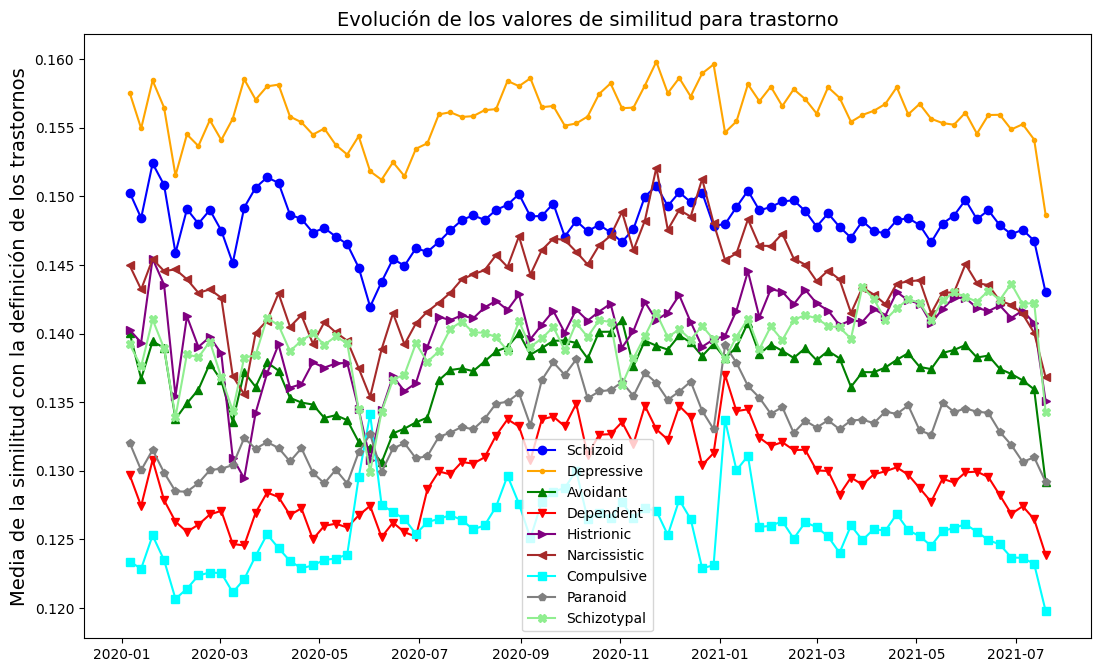

In [5]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
disordersUs = pd.read_csv('../../Results/ResultsUS/disorders_groupedUs.csv', parse_dates=['weekdate'], index_col ='weekdate')

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)


ax.plot(disordersUs['Schizoid'],'o-',color='blue',label='Schizoid'); 
ax.plot(disordersUs['Depressive'],'.-',color='orange',label='Depressive');
ax.plot(disordersUs['Avoidant'],'^-',color='green',label='Avoidant'); 
ax.plot(disordersUs['Dependent'],'v-',color='red',label='Dependent'); 
ax.plot(disordersUs['Histrionic'],'>-',color='purple',label='Histrionic'); 
ax.plot(disordersUs['Narcissistic'],'<-',color='brown',label='Narcissistic'); 
ax.plot(disordersUs['Compulsive'],'s-',color='cyan',label='Compulsive'); 
ax.plot(disordersUs['Paranoid'],'p-',color='grey',label='Paranoid'); 
ax.plot(disordersUs['Schizotypal'],'X-',color='lightgreen',label='Schizotypal'); 

ax.set_ylabel('Mean similarity to the definition of disorders',size=14)
ax.legend()
ax.set_title('Evolution of similarity values for disorder', size=14)
plt.show()

## VADER ES

In [6]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
vader = pd.read_csv('../../Results/ResultsES/vader_groupedEs.csv', parse_dates=['weekdate'])
empath = pd.read_csv('../../Results/ResultsES/emp_groupedEs.csv', parse_dates=['weekdate'])
empath_count = pd.read_csv('ResultsES/emp_countsEs.csv', parse_dates=['weekdate'])
empath['empadict'] = empath['empadict'].map(lambda x: json.loads(re.sub('\'', '"', x)))
empath_count['empadict'] = empath_count['empadict'].map(lambda x: json.loads(re.sub('\'', '"', x)))

# Normalizing results and building error bars assuming a binomial distribution 
vader['norm'] = vader['counts']/vader['total']
vader['errornorm'] = np.sqrt((vader['counts'] * (vader['total'] - vader['counts']))/ vader['total']) / vader['total']

tweets_pos=vader[vader['sentiment'] == 'positive']
tweets_neg=vader[vader['sentiment'] == 'negative']
tweets_neu=vader[vader['sentiment'] == 'neutral']

emp_cnt = pd.DataFrame(empath_count['empadict'].tolist(),index = empath_count['weekdate'])
category_list=emp_cnt.sum().sort_values(ascending=False)
top_cat = category_list.head(10).keys()


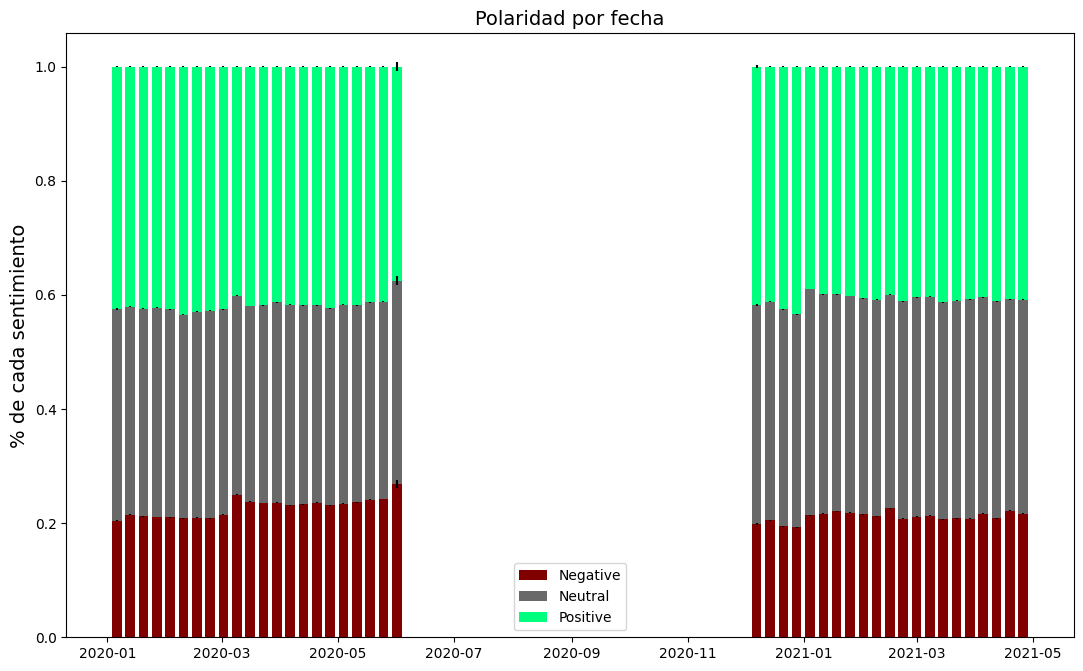

In [7]:

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax.bar(tweets_neg['weekdate'], tweets_neg['norm'], yerr=tweets_neg['errornorm'], label='Negative', 
       color='maroon',width = 5)
ax.bar(tweets_neu['weekdate'], tweets_neu['norm'], yerr=tweets_neu['errornorm'], label='Neutral', 
       color='dimgrey',bottom=tweets_neg['norm'],width = 5)
ax.bar(tweets_pos['weekdate'], tweets_pos['norm'], yerr=tweets_pos['errornorm'], label='Positive',
       color='springgreen', bottom=np.array(tweets_neu['norm'])+np.array(tweets_neg['norm']),
       width = 5)
ax.set_ylabel('Proportion for each sentiment',size =14)
ax.set_title('Polarity per week', size  =14)
ax.legend()

plt.show()


## Empath ES

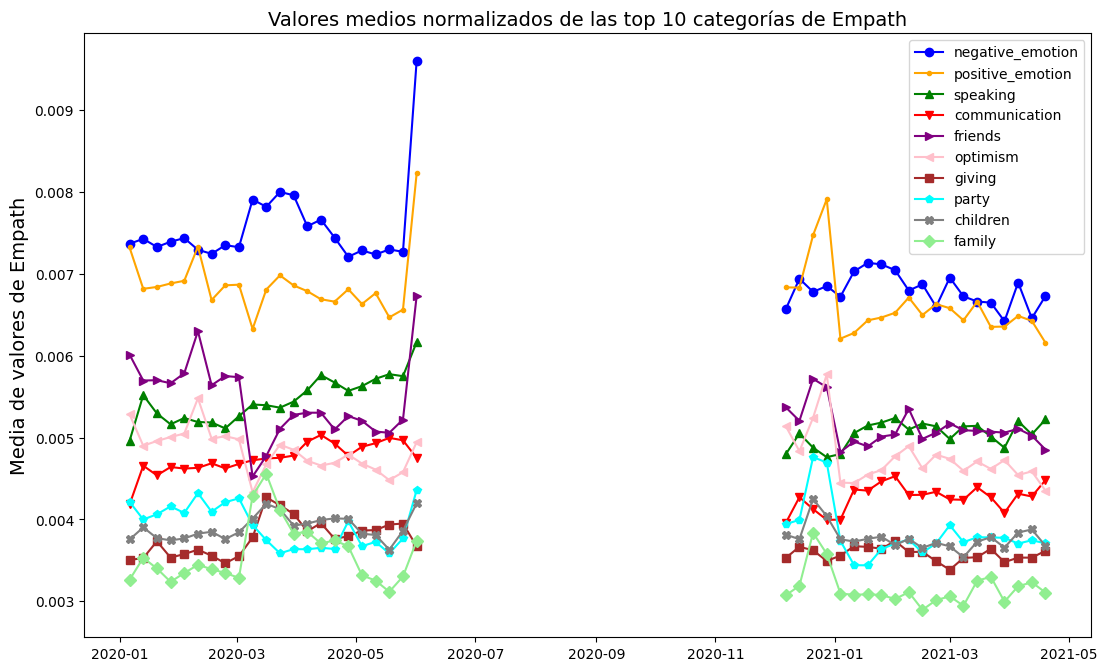

In [8]:
emp_df = pd.DataFrame(empath['empadict'].tolist(),index = empath['weekdate'])

markers=['o','.', '^', 'v', '>', '<', 's', 'p', 'X', 'D']
colors = ['blue','orange','green','red','purple','pink','brown','cyan','grey','lightgreen']

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)
for i in range(10):
    ax.plot(emp_df[top_cat[i]], marker = markers[i])
ax.set_ylabel('Average Empath values', size =14)
ax.set_title('Normalised average values of Empath top 10 categories',size =14)
ax.legend(top_cat)
plt.show()

## ES big5

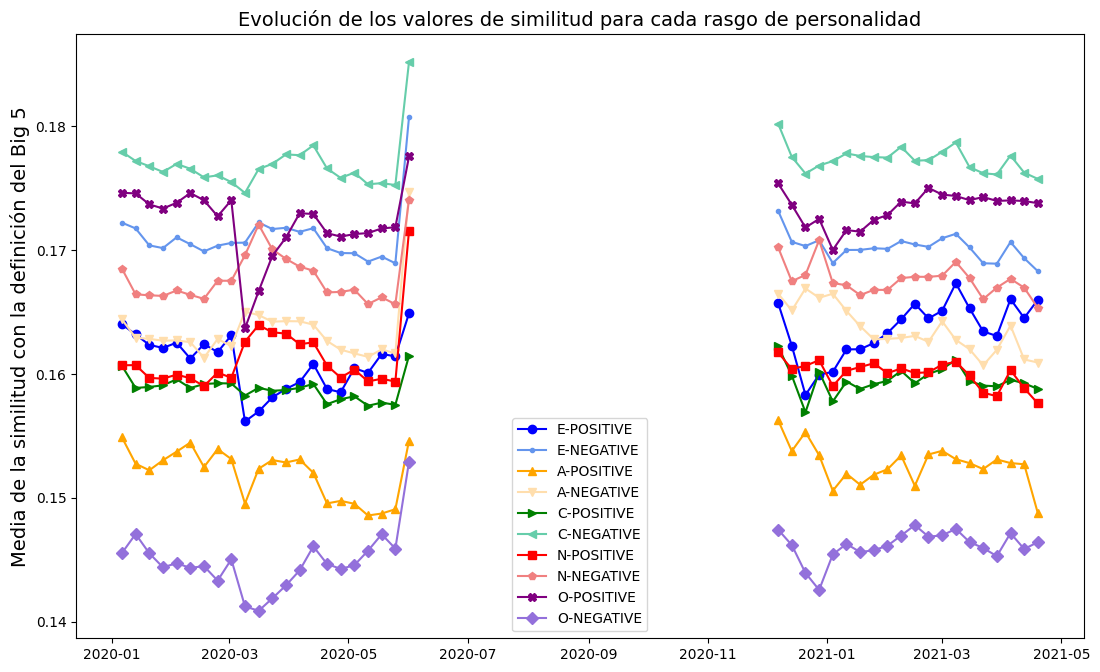

In [9]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
big5ES = pd.read_csv('../../Results/ResultsES/big5_groupedEs.csv', parse_dates=['weekdate'], index_col ='weekdate')

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)

#E
ax.plot(big5ES['E-POSITIVE'][0:22],'o-',color='blue',label='E-POSITIVE'); ax.plot(big5ES['E-POSITIVE'][22:-1],'o-',color='blue')
ax.plot(big5ES['E-NEGATIVE'][0:22],'.-',color='cornflowerblue',label='E-NEGATIVE'); ax.plot(big5ES['E-NEGATIVE'][22:-1],'.-',color='cornflowerblue')
#A
ax.plot(big5ES['A-POSITIVE'][0:22],'^-',color='orange',label='A-POSITIVE'); ax.plot(big5ES['A-POSITIVE'][22:-1],'^-',color='orange')
ax.plot(big5ES['A-NEGATIVE'][0:22],'v-',color='navajowhite',label='A-NEGATIVE'); ax.plot(big5ES['A-NEGATIVE'][22:-1],'v-',color='navajowhite')
#C
ax.plot(big5ES['C-POSITIVE'][0:22],'>-',color='green',label='C-POSITIVE'); ax.plot(big5ES['C-POSITIVE'][22:-1],'>-',color='green')
ax.plot(big5ES['C-NEGATIVE'][0:22],'<-',color='mediumaquamarine',label='C-NEGATIVE'); ax.plot(big5ES['C-NEGATIVE'][22:-1],'<-',color='mediumaquamarine')
#N
ax.plot(big5ES['N-POSITIVE'][0:22],'s-',color='red',label='N-POSITIVE'); ax.plot(big5ES['N-POSITIVE'][22:-1],'s-',color='red')
ax.plot(big5ES['N-NEGATIVE'][0:22],'p-',color='lightcoral',label='N-NEGATIVE'); ax.plot(big5ES['N-NEGATIVE'][22:-1],'p-',color='lightcoral')
#O
ax.plot(big5ES['O-POSITIVE'][0:22],'X-',color='purple',label='O-POSITIVE'); ax.plot(big5ES['O-POSITIVE'][22:-1],'X-',color='purple')
ax.plot(big5ES['O-NEGATIVE'][0:22],'D-',color='mediumpurple',label='O-NEGATIVE'); ax.plot(big5ES['O-NEGATIVE'][22:-1],'D-',color='mediumpurple')


ax.set_ylabel('Average similarity with the Big 5 definition',size=14)
ax.legend()
ax.set_title('Evolution of similarity values for each personality trait', size=14)
plt.show()

## Disorders ES

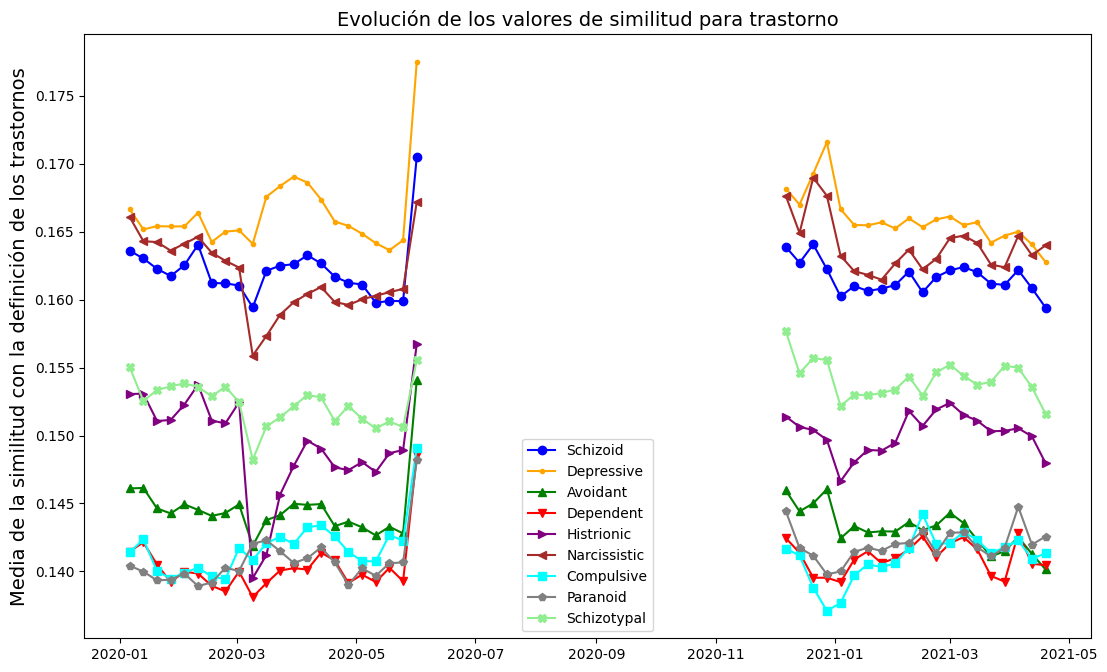

In [10]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re

# Start reading results from disk here in order to not repeat 
# the computation.
disordersES = pd.read_csv('../../Results/ResultsES/disorders_groupedEs.csv', parse_dates=['weekdate'], index_col ='weekdate')

fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)


ax.plot(disordersES['Schizoid'][0:22],'o-',color='blue',label='Schizoid'); 
ax.plot(disordersES['Depressive'][0:22],'.-',color='orange',label='Depressive');
ax.plot(disordersES['Avoidant'][0:22],'^-',color='green',label='Avoidant'); 
ax.plot(disordersES['Dependent'][0:22],'v-',color='red',label='Dependent'); 
ax.plot(disordersES['Histrionic'][0:22],'>-',color='purple',label='Histrionic'); 
ax.plot(disordersES['Narcissistic'][0:22],'<-',color='brown',label='Narcissistic'); 
ax.plot(disordersES['Compulsive'][0:22],'s-',color='cyan',label='Compulsive'); 
ax.plot(disordersES['Paranoid'][0:22],'p-',color='grey',label='Paranoid'); 
ax.plot(disordersES['Schizotypal'][0:22],'X-',color='lightgreen',label='Schizotypal'); 
ax.plot(disordersES['Schizoid'][22:-1],'o-',color='blue',label='Schizoid'); 
ax.plot(disordersES['Depressive'][22:-1],'.-',color='orange',label='Depressive');
ax.plot(disordersES['Avoidant'][22:-1],'^-',color='green',label='Avoidant'); 
ax.plot(disordersES['Dependent'][22:-1],'v-',color='red',label='Dependent'); 
ax.plot(disordersES['Histrionic'][22:-1],'>-',color='purple',label='Histrionic'); 
ax.plot(disordersES['Narcissistic'][22:-1],'<-',color='brown',label='Narcissistic'); 
ax.plot(disordersES['Compulsive'][22:-1],'s-',color='cyan',label='Compulsive'); 
ax.plot(disordersES['Paranoid'][22:-1],'p-',color='grey',label='Paranoid'); 
ax.plot(disordersES['Schizotypal'][22:-1],'X-',color='lightgreen',label='Schizotypal'); 

ax.set_ylabel('Mean similarity to the definition of disorders',size=14)
ax.legend(disordersES.columns)
ax.set_title('Evolution of similarity values for disorder', size=14)
plt.show()

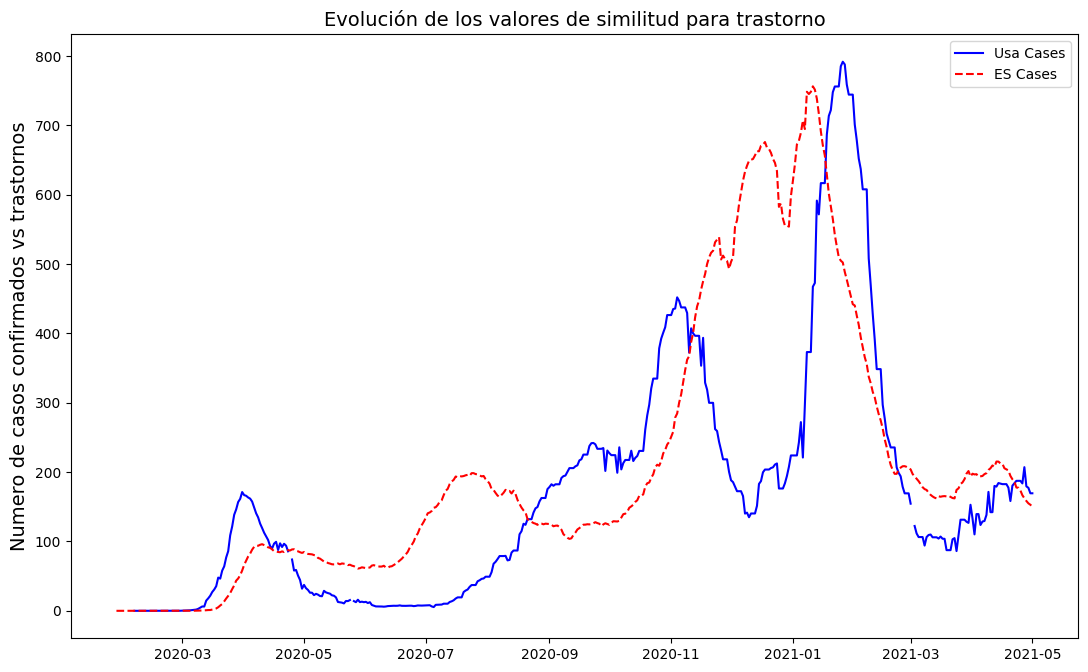

In [31]:
# Imports in case you didnt run it before
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import re
import datetime

x = datetime.datetime(2020, 1, 1)
y = datetime.datetime(2021, 5, 1)


# Start reading results from disk here in order to not repeat 
# the computation.
cases = pd.read_csv('cases.csv', parse_dates=['date'], usecols = ['iso_code', 'date', 'new_cases_smoothed_per_million'])
mask = (cases['date'] > x) & (cases['date'] <= y)
cases = cases.loc[mask].reset_index().set_index('date') 
#cases['weekdate'] = pd.to_datetime(cases['date'],format='%yy-%mm-%dd') - pd.to_datetime(cases['date'],format='%yy-%mm-%dd').dt.weekday * np.timedelta64(1,'D')
casesES = cases.loc[cases['iso_code']=='ESP']
casesUS = cases.loc[cases['iso_code']=='USA']



fig=plt.figure()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax = fig.add_subplot(1,1,1)


ax.plot(casesES['new_cases_smoothed_per_million'],'-',color='blue',label='Usa Cases'); 
ax.plot(casesUS['new_cases_smoothed_per_million'],'--',color='red',label='ES Cases');



ax.set_ylabel('Number of confirmed cases vs. disorders',size=14)
ax.legend()
ax.set_title('Evolution of similarity values for disorder', size=14)
plt.show()


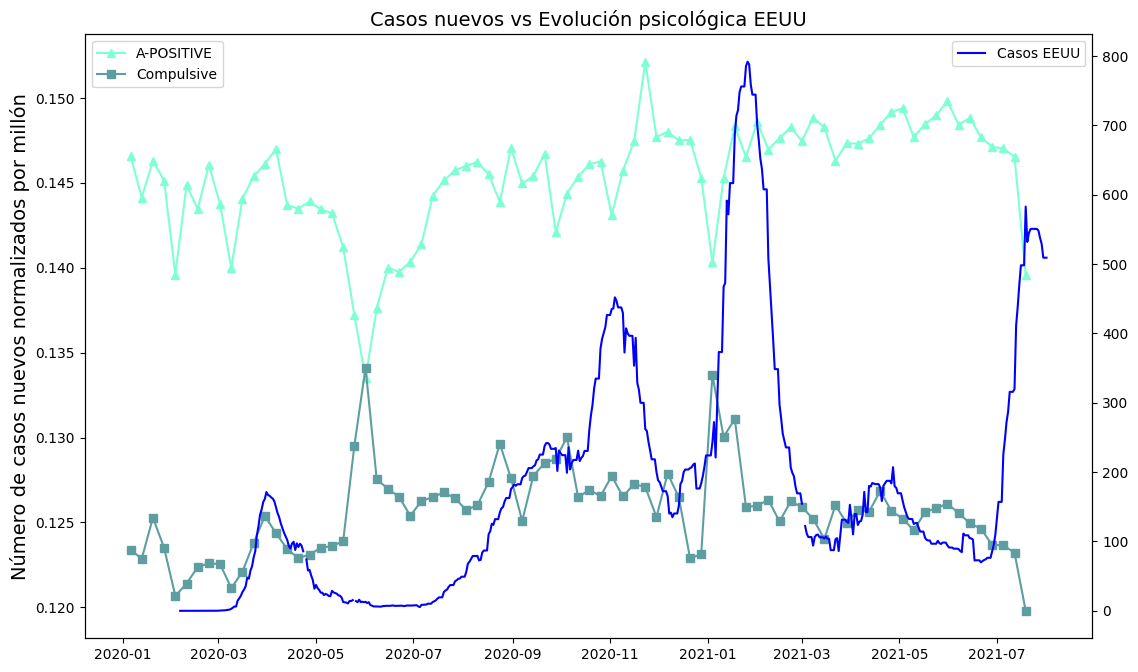

In [26]:
fig1, ax1=plt.subplots()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax2 =ax1.twinx()

ax1.plot(big5['A-POSITIVE'],'^-',color='aquamarine',label='A-POSITIVE'); 
ax1.plot(disordersUs['Compulsive'],'s-',color='cadetblue',label='Compulsive');ax.plot(big5ES['O-POSITIVE'][0:22],'X-',color='purple',label='ES O-POSITIVE'); ax.plot(big5ES['O-POSITIVE'][22:-1],'X-',color='purple')
#ax1.plot(disordersES['Depressive'][0:22],'.-',color='lightcoral',label='ES Depressive');
#ax1.plot(disordersES['Depressive'][22:-1],'.-',color='lightcoral');
#ax1.plot(disordersES['Narcissistic'][0:22],'<-',color='darksalmon'); 
#ax1.plot(disordersES['Narcissistic'][22:-1],'<-',color='darksalmon',label='ES Narcissistic'); 
ax2.plot(casesES['new_cases_smoothed_per_million'],'-',color='blue',label='Casos EEUU'); 
#ax2.plot(casesUS['new_cases_smoothed_per_million'],'--',color='red',label='Casos España');


ax1.set_ylabel('Degree of similarity definition/disorder',size=14)
ax1.set_ylabel('Number of new standardised cases per million',size=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('New cases vs. psychological evolution US', size=14)
plt.show()

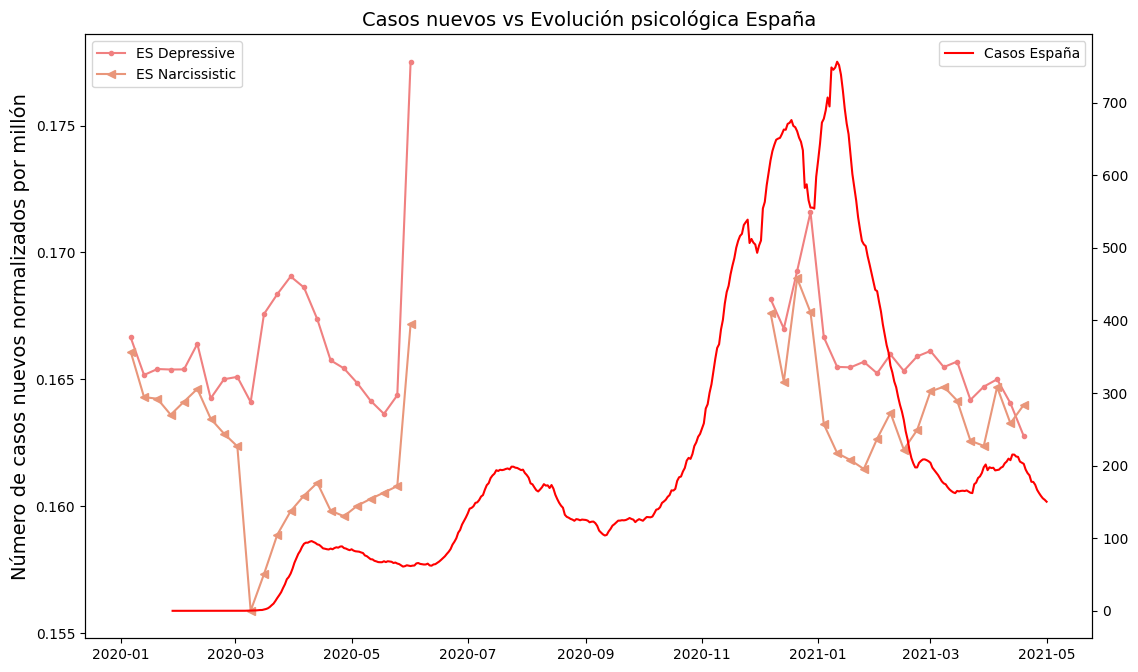

In [32]:
fig1, ax1=plt.subplots()
plt.rcParams['figure.figsize'] = [13, 8]
plt.rcParams['figure.dpi'] = 100
ax2 =ax1.twinx()

#ax1.plot(big5['A-POSITIVE'],'^-',color='aquamarine',label='A-POSITIVE'); 
#ax1.plot(disordersUs['Compulsive'],'s-',color='cadetblue',label='Compulsive');ax.plot(big5ES['O-POSITIVE'][0:22],'X-',color='purple',label='ES O-POSITIVE'); ax.plot(big5ES['O-POSITIVE'][22:-1],'X-',color='purple')
ax1.plot(disordersES['Depressive'][0:22],'.-',color='lightcoral',label='ES Depressive');
ax1.plot(disordersES['Depressive'][22:-1],'.-',color='lightcoral');
ax1.plot(disordersES['Narcissistic'][0:22],'<-',color='darksalmon'); 
ax1.plot(disordersES['Narcissistic'][22:-1],'<-',color='darksalmon',label='ES Narcissistic'); 
#ax2.plot(casesES['new_cases_smoothed_per_million'],'-',color='blue',label='Casos EEUU'); 
ax2.plot(casesUS['new_cases_smoothed_per_million'],'-',color='red',label='Casos España');


ax1.set_ylabel('Degree of similarity definition/disorder',size=14)
ax1.set_ylabel('Number of new standardised cases per million',size=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('New cases vs. psychological evolution ES', size=14)
plt.show()